In [ ]:
 import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("/content/airline-passengers.csv", parse_dates=['Month'], index_col='Month')

In [ ]:
display(df.head())
display(df.info())
display(df.describe())

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


None

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


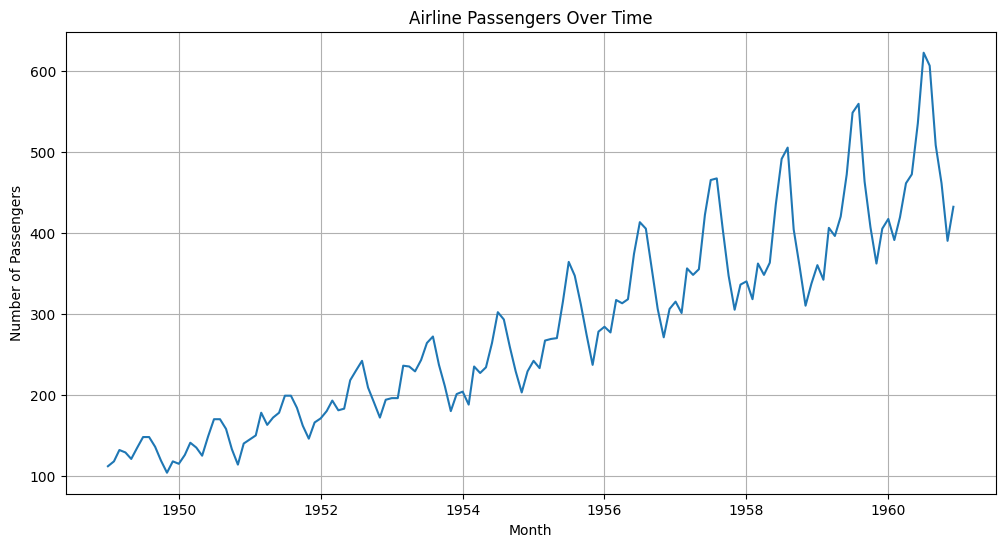

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Passengers'])
plt.title('Airline Passengers Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Passengers'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


In [ ]:
df_diff = df['Passengers'].diff().dropna()
display(df_diff.head())

result_diff = adfuller(df_diff)
print('ADF Statistic after differencing: %f' % result_diff[0])
print('p-value after differencing: %f' % result_diff[1])
print('Critical Values after differencing:')
for key, value in result_diff[4].items():
    print('\t%s: %.3f' % (key, value))

,Passengers
Month,
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
1949-06-01,14.0


ADF Statistic after differencing: -2.829267
p-value after differencing: 0.054213
Critical Values after differencing:
	1%: -3.482
	5%: -2.884
	10%: -2.579


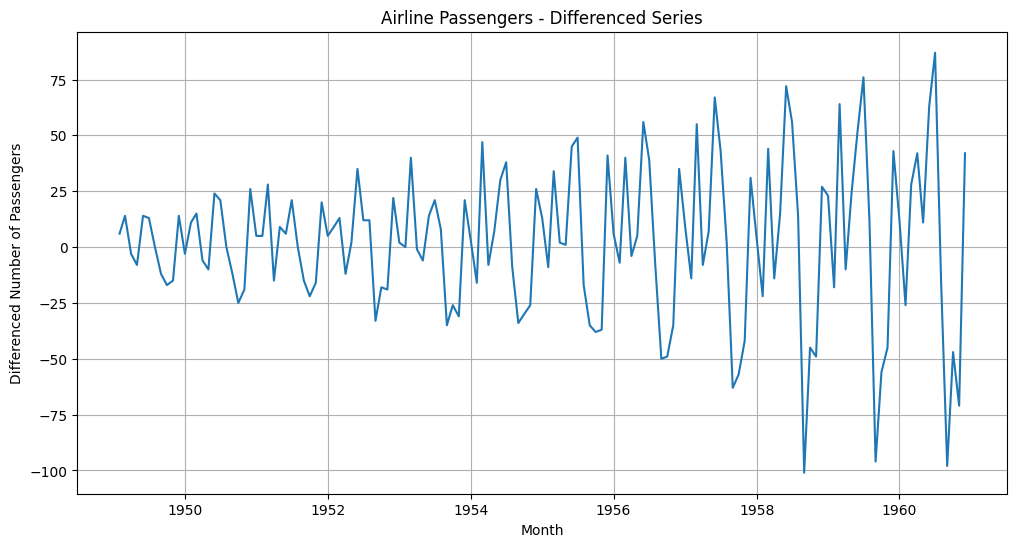

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_diff)
plt.title('Airline Passengers - Differenced Series')
plt.xlabel('Month')
plt.ylabel('Differenced Number of Passengers')
plt.grid(True)
plt.show()

In [ ]:
train_data = df[:-12]
test_data = df[-12:]

print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)

Training data shape: (132, 1)
Testing data shape: (12, 1)


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data['Passengers'], order=(5, 1, 0))
model_fit = model.fit()                                                                                                                        `
print(model_fit.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  132
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -621.898
Date:                Tue, 16 Sep 2025   AIC                           1255.796
Time:                        10:53:14   BIC                           1273.047
Sample:                    01-01-1949   HQIC                          1262.806
                         - 12-01-1959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3005      0.101      2.986      0.003       0.103       0.498
ar.L2         -0.1903      0.096     -1.972      0.049      -0.379      -0.001
ar.L3         -0.0961      0.069     -1.391      0.1

In [ ]:
predictions = model_fit.predict(start=len(train_data), end=len(df)-1)
print(predictions.head())

1960-01-01    458.449443
1960-02-01    479.570531
1960-03-01    480.136849
1960-04-01    456.665330
1960-05-01    435.835310
Freq: MS, Name: predicted_mean, dtype: float64


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

mse = mean_squared_error(test_data['Passengers'], predictions)
mae = mean_absolute_error(test_data['Passengers'], predictions)
rmse = np.sqrt(mse)

print(f'MSE: {mse:.3f}')
print(f'MAE: {mae:.3f}')
print(f'RMSE: {rmse:.3f}')

MSE: 7535.999
MAE: 67.389
RMSE: 86.810


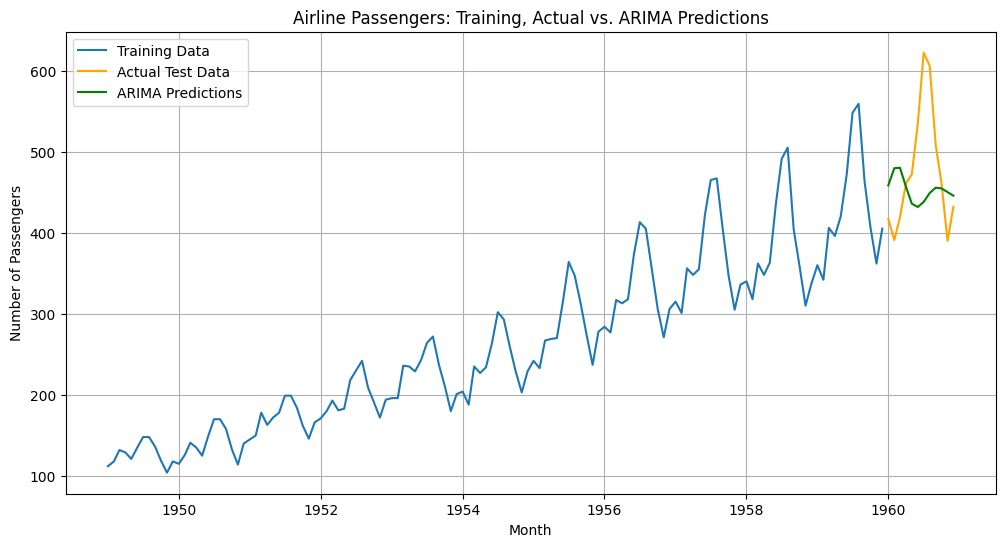

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(train_data['Passengers'], label='Training Data')
plt.plot(test_data['Passengers'], label='Actual Test Data', color='orange')
plt.plot(predictions, label='ARIMA Predictions', color='green')
plt.title('Airline Passengers: Training, Actual vs. ARIMA Predictions')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()